In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns

**Glimpse at raw training data**

In [ ]:
data_file = '/content/drive/MyDrive/cs6220_assignment5/titanic.train.csv'
train = pd.read_csv(data_file, delimiter = ",")
train.info()
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     891 non-null    int64  
 1   survived   891 non-null    int64  
 2   name       891 non-null    object 
 3   sex        891 non-null    object 
 4   age        698 non-null    float64
 5   sibsp      891 non-null    int64  
 6   parch      891 non-null    int64  
 7   ticket     891 non-null    object 
 8   fare       890 non-null    float64
 9   cabin      189 non-null    object 
 10  embarked   890 non-null    object 
 11  boat       340 non-null    object 
 12  body       82 non-null     float64
 13  home.dest  492 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 97.6+ KB


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.50,NaN,S,11,NaN,NaN
1,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.00,NaN,S,11,NaN,"Plymouth, Devon / Detroit, MI"
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.60,C2,S,8,NaN,"Isleworth, England"
3,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,NaN,269.0,"Milwaukee, WI"
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.95,NaN,Q,15,NaN,"Co Athlone, Ireland New York, NY"


<Axes: >

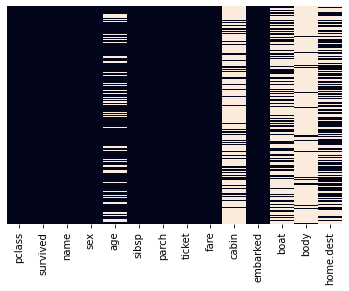

In [ ]:
# check out missing data
train_if_missing = train.isnull()
sns.heatmap(train_if_missing, yticklabels = False, cbar = False)

**Data processing before model training**

In [ ]:
# handle missing data in age 
# replace NA with average age
age_avg = train['age'].mean()

def age_tran(age):
  if pd.isnull(age):
    return age_avg
  else:
    return age


train['age'] = train['age'].apply(age_tran)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     891 non-null    int64  
 1   survived   891 non-null    int64  
 2   name       891 non-null    object 
 3   sex        891 non-null    object 
 4   age        891 non-null    float64
 5   sibsp      891 non-null    int64  
 6   parch      891 non-null    int64  
 7   ticket     891 non-null    object 
 8   fare       890 non-null    float64
 9   cabin      189 non-null    object 
 10  embarked   890 non-null    object 
 11  boat       340 non-null    object 
 12  body       82 non-null     float64
 13  home.dest  492 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 97.6+ KB


In [ ]:
# handle missing data in fare
# replace NA with average fare

fare_avg = train['fare'].mean()

def fare_tran(fare):
  if pd.isnull(fare):
    return fare_avg
  else:
    return fare

train['fare'] = train['fare'].apply(fare_tran)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     891 non-null    int64  
 1   survived   891 non-null    int64  
 2   name       891 non-null    object 
 3   sex        891 non-null    object 
 4   age        891 non-null    float64
 5   sibsp      891 non-null    int64  
 6   parch      891 non-null    int64  
 7   ticket     891 non-null    object 
 8   fare       891 non-null    float64
 9   cabin      189 non-null    object 
 10  embarked   890 non-null    object 
 11  boat       340 non-null    object 
 12  body       82 non-null     float64
 13  home.dest  492 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 97.6+ KB


In [ ]:
# get dummies for sex and embark

sex = pd.get_dummies(train['sex'], drop_first=True)
embarked = pd.get_dummies(train['embarked'], drop_first=True)

In [ ]:
# drop unneccessary columns
# concat train with sex and embarked dummies to make data trainable
drop_col = ['sex','embarked', 'name', 'cabin', 'body', 'boat', 'home.dest', 'ticket']
train = pd.concat([train, sex, embarked], axis = 1)
train.drop(drop_col,axis = 1, inplace = True)

train.info()
train.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   survived  891 non-null    int64  
 2   age       891 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,3,1,29.0,0,0,9.50,1,0,1
1,2,1,8.0,1,1,26.00,0,0,1
2,1,1,22.0,1,0,66.60,0,0,1
3,1,0,70.0,1,1,71.00,1,0,1
4,3,1,30.0,0,0,6.95,0,1,0


In [ ]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

mmc = MinMaxScaler()
train = pd.DataFrame(mmc.fit_transform(train), columns = ['pclass','survived','age','sibsp','parch','fare','male','Q','S'])

train.head(5)

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,0.361169,0.000,0.000000,0.018543,1.0,0.0,1.0
1,0.5,1.0,0.098121,0.125,0.111111,0.050749,0.0,0.0,1.0
2,0.0,1.0,0.273486,0.125,0.000000,0.129995,0.0,0.0,1.0
3,0.0,0.0,0.874739,0.125,0.111111,0.138583,1.0,0.0,1.0
4,1.0,1.0,0.373695,0.000,0.000000,0.013565,0.0,1.0,0.0


In [ ]:
X = train.drop('survived', axis = 1)
y = train['survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = logistic_model.predict(X_test)

**See how model works on validation set**

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, predictions) * 100
print(test_acc)

79.82062780269058


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       138
         1.0       0.74      0.73      0.73        85

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



**Apply model to test data**

In [ ]:
test_file = '/content/drive/MyDrive/cs6220_assignment5/titanic.test.csv'
test = pd.read_csv(test_file, delimiter = ",")

In [ ]:
age_avg = test['age'].mean()

def age_tran(age):
  if pd.isnull(age):
    return age_avg
  else:
    return age


test['age'] = test['age'].apply(age_tran)

In [ ]:
fare_avg = test['fare'].mean()

def fare_tran(fare):
  if pd.isnull(fare):
    return fare_avg
  else:
    return fare

test['fare'] = test['fare'].apply(fare_tran)

In [ ]:
sex = pd.get_dummies(test['sex'], drop_first=True)
embarked = pd.get_dummies(test['embarked'], drop_first=True)

In [ ]:
drop_col = ['sex','embarked', 'name', 'cabin', 'body', 'boat', 'home.dest', 'ticket']
test_elements = pd.concat([test, sex, embarked], axis = 1)
test_elements.drop(drop_col,axis = 1, inplace = True)


In [ ]:
test_mmc = MinMaxScaler()
train = pd.DataFrame(test_mmc.fit_transform(test_elements), columns = ['pclass','survived','age','sibsp','parch','fare','male','Q','S'])

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression()

In [ ]:
X_pre = test_elements.drop('survived', axis = 1)
y_pre = test_elements['survived']

In [ ]:
predictions_for_test = logistic_model.predict(X_pre)

In [ ]:
# accuracy score
test_acc = accuracy_score(y_pre, predictions_for_test) * 100
print("The accuracy is: ",test_acc, "%")

The accuracy is:  68.6602870813397 %


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Dense
from keras.models import Sequential 

In [ ]:
neural_model = Sequential ([
    Dense(units = 10, activation = 'relu'),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 1, activation = 'linear'),
])



In [ ]:
from keras.losses import BinaryCrossentropy

In [ ]:
neural_model.compile(loss = BinaryCrossentropy(from_logits = True))

In [ ]:
neural_model.fit(X, y, epochs = 100)

Epoch 1/100
28/28 [==============================] - 0s 7ms/step - loss: 0.7003
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 0.6803
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.6652
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 0.6530
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6425
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6334
Epoch 7/100
28/28 [==============================] - 0s 8ms/step - loss: 0.6250
Epoch 8/100
28/28 [==============================] - 0s 9ms/step - loss: 0.6174
Epoch 9/100
28/28 [==============================] - 0s 7ms/step - loss: 0.6102
Epoch 10/100
28/28 [==============================] - 0s 6ms/step - loss: 0.6035
Epoch 11/100
28/28 [==============================] - 0s 7ms/step - loss: 0.5972
Epoch 12/100
28/28 [==============================] - 0s 14ms/step - loss: 0.5918
Epoch 13/100
28/28 [================

In [ ]:
nn_predict = neural_model.predict(X_pre)

14/14 [==============================] - 0s 5ms/step


In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_pre, nn_predict)
m.result().numpy()

0.34688994